In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd


    


def get_pages():
    urls = [f"https://basketball.realgm.com/nba/stats/2023/Averages/Qualified/points/All/desc/{i}/Regular_Season" for i in range(1,5)]
    
    html = requests.get(urls[0]).content
    time.sleep(random.uniform(1,3))
    soup = BeautifulSoup(html, 'html.parser')

    table = soup.find_all('table', {"data-tablesaw-mode":"swipe"})[0]
    stats = [stat.text for stat in table.find('thead').find_all('th')][1:]
    stats_df = pd.DataFrame(columns=stats)

    for url in urls:
        html = requests.get(url).content
        time.sleep(random.uniform(1,3))
        soup = BeautifulSoup(html, 'html.parser')

        table = soup.find_all('table', {"data-tablesaw-mode":"swipe"})[0]

        player_stats_list = []
        rows = table.find('tbody').find_all('tr')
        for row in rows:
            player_stats = row.getText(separator='***').split('***')[1:]
            player_stats_list.append(player_stats)


        stats_df = pd.concat([stats_df, pd.DataFrame(player_stats_list, columns=stats)])
        
    return stats_df

        


data_df = get_pages()

In [15]:
data = data_df.copy()

for column in data.columns[2:]:
    data[column] = [float(point) for point in data[column]]

data

,Player,Team,GP,MPG,PPG,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
0,Luka Doncic,DAL,7.0,36.6,36.1,12.7,24.7,0.514,2.0,8.4,...,11.3,0.772,1.1,7.7,8.9,9.0,1.7,0.4,3.3,3.1
1,Giannis Antetokounmpo,MIL,7.0,33.5,33.6,12.4,21.9,0.569,0.9,3.6,...,11.9,0.663,2.3,10.4,12.7,5.0,1.1,1.7,3.0,2.9
2,Kevin Durant,BRK,8.0,37.8,32.5,10.6,20.1,0.528,1.8,5.1,...,10.1,0.938,0.5,5.1,5.6,4.4,1.0,2.0,3.9,2.5
3,Shai Gilgeous-Alexander,OKC,7.0,35.8,32.3,12.0,22.0,0.545,1.0,3.1,...,7.4,0.981,1.0,3.7,4.7,6.3,2.4,1.1,3.4,2.3
4,Ja Morant,MEM,7.0,32.6,31.4,10.4,19.9,0.525,2.0,3.9,...,10.0,0.857,1.1,4.0,5.1,6.4,0.9,0.4,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Matisse Thybulle,PHI,8.0,10.1,1.4,0.5,1.5,0.333,0.3,0.9,...,0.4,0.333,0.1,0.9,1.0,0.6,0.6,0.3,0.1,0.9
97,Josh Okogie,PHX,6.0,3.8,1.3,0.5,1.0,0.500,0.0,0.3,...,0.3,1.000,0.5,0.8,1.3,0.0,0.2,0.0,0.0,0.5
98,KZ Okpala,SAC,6.0,6.4,0.5,0.2,0.8,0.200,0.2,0.7,...,0.0,0.000,0.3,0.7,1.0,0.3,0.0,0.0,0.0,0.7
99,Jaxson Hayes,NOP,5.0,7.4,0.4,0.2,1.0,0.200,0.0,0.4,...,0.4,0.000,0.2,0.8,1.0,0.6,0.2,0.2,0.2,1.0


In [2]:
import numpy as np

# Data is averages

scatter_df = data[['3P%', 'FT%', '3PA', 'FTA']]
scatter_df = scatter_df[(scatter_df['FTA'] > 0) & (scatter_df['3PA'] > 3)]

#  & (scatter_df['FTA'] > 1)

x_feature, y_feature = '3P%', 'FT%'
x, y = scatter_df[x_feature], scatter_df[y_feature]

plt.scatter(x, y)

plt.xlabel(x_feature)
plt.ylabel(y_feature)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)        


plt.show()


# Try to identify what position a player plays

# compare 3P% of teams

NameError: name 'data' is not defined

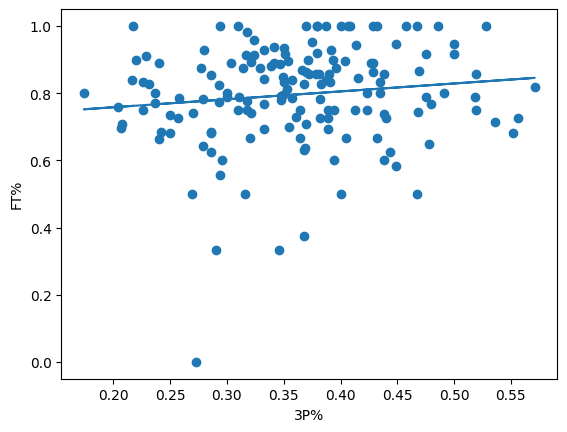

In [ ]:
import numpy as np

# Data is averages

scatter_df = data[['3P%', 'FT%', '3PA', 'FTA']]
scatter_df = scatter_df[(scatter_df['FTA'] > 0) & (scatter_df['3PA'] > 3)]

#  & (scatter_df['FTA'] > 1)

x_feature, y_feature = '3P%', 'FT%'
x, y = scatter_df[x_feature], scatter_df[y_feature]

plt.scatter(x, y)

plt.xlabel(x_feature)
plt.ylabel(y_feature)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)        


plt.show()


# Try to identify what position a player plays

# compare 3P% of teams

In [ ]:
import numpy as np

# Data is averages

scatter_df = data[['3P%', 'FT%', '3PA', 'FTA']]
scatter_df = scatter_df[(scatter_df['FTA'] > 0) & (scatter_df['3PA'] > 3)]

#  & (scatter_df['FTA'] > 1)

x_feature, y_feature = '3P%', 'FT%'
x, y = scatter_df[x_feature], scatter_df[y_feature]

plt.scatter(x, y)

plt.xlabel(x_feature)
plt.ylabel(y_feature)

a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)        


plt.show()


# Try to identify what position a player plays

# compare 3P% of teams